In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from keras.layers import Input, Dense
from keras.models import Model
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
X_train = pd.read_csv("bindigit_trn.csv",header=None,dtype=np.float32).as_matrix()
y_train = pd.read_csv("targetdigit_trn.csv",header=None,names=["Label"],dtype=np.float32).as_matrix()

X_test = pd.read_csv("bindigit_tst.csv",header=None,dtype=np.float32).as_matrix()
y_test = pd.read_csv("targetdigit_tst.csv",header=None,names=["Label"],dtype=np.float32).as_matrix()

In [4]:
def plotWeights(weights):
    n = weights.shape[0]  # how many digits we will display
    plt.figure(figsize=(20, 20))
    for i in range(n):
        # display weights
        ax = plt.subplot(10, 10, i + 1)
        plt.imshow(weights[i].reshape(10, 10))
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [5]:
#autoencoder = sa.AutoEncoder(layers)

In [6]:
'''
input_img = Input(shape=(784,))
encoded = Dense(150, activation='relu')(input_img) #1st hidden layer
encoded = Dense(50, activation='relu')(encoded) #2nd hidden layer

decoded = Dense(150, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img,encoded)

autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')
'''

"\ninput_img = Input(shape=(784,))\nencoded = Dense(150, activation='relu')(input_img) #1st hidden layer\nencoded = Dense(50, activation='relu')(encoded) #2nd hidden layer\n\ndecoded = Dense(150, activation='relu')(encoded)\ndecoded = Dense(784, activation='sigmoid')(encoded)\n\nautoencoder = Model(input_img,encoded)\n\nautoencoder.compile(optimizer='adadelta', loss='mean_squared_error')\n"

In [7]:
'''
autoencoder.fit(X_train,X_train,
               epochs=20,
               batch_size=64,
               shuffle=True,
               verbose=0,
                validation_data=(X_test, X_test))
                '''

'\nautoencoder.fit(X_train,X_train,\n               epochs=20,\n               batch_size=64,\n               shuffle=True,\n               verbose=0,\n                validation_data=(X_test, X_test))\n                '

In [8]:
'''
encoder = Model(input_img,encoded)
pred = encoder.predict(X_train)
'''

'\nencoder = Model(input_img,encoded)\npred = encoder.predict(X_train)\n'

In [9]:
'''
logistic = LogisticRegression(C=100,verbose=True)
logistic.fit(pred,y_train)
'''

'\nlogistic = LogisticRegression(C=100,verbose=True)\nlogistic.fit(pred,y_train)\n'

In [10]:
'''
pred_encoded = encoder.predict(X_test)
predicted = logistic.predict(pred_encoded)
'''

'\npred_encoded = encoder.predict(X_test)\npredicted = logistic.predict(pred_encoded)\n'

In [11]:
'''
print("Logistic regression using Autoencoder features:\n%s\n" %
      metrics.classification_report(y_test,predicted))

print("Accuracy:",metrics.accuracy_score(y_test,predicted))
print("\n")
'''

'\nprint("Logistic regression using Autoencoder features:\n%s\n" %\n      metrics.classification_report(y_test,predicted))\n\nprint("Accuracy:",metrics.accuracy_score(y_test,predicted))\nprint("\n")\n'

In [12]:
#alternate with perceptron classification

input_img = Input(shape=(784,))
encoded1 = Dense(150, activation='relu')(input_img) #1st hidden layer
encoded2 = Dense(100, activation='relu')(encoded1) #2nd hidden layer
encoded3 = Dense(50, activation='relu')(encoded2) #3d hidden layer
decoded1 = Dense(100, activation='relu')(encoded3)
decoded2 = Dense(150, activation='relu')(decoded1)
decoded3 = Dense(784, activation='sigmoid')(decoded2)

autoencoder = Model(input_img,decoded3)

autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [13]:
autoencoder.fit(X_train,X_train,
               epochs=20,
               batch_size=64,
               shuffle=True,
               verbose=0,
                validation_data=(X_test, X_test))

In [14]:
hidden = Dense(50, activation='relu')(encoded2)
out = Dense(10, activation='sigmoid')(hidden)
classifier = Model(input_img,out)
classifier.compile(optimizer='adadelta', loss='mean_squared_error')

In [15]:
y_train = to_categorical(y_train, num_classes=10)
classifier.fit(X_train,y_train,
               epochs=50,
               batch_size=64,
               shuffle=True,
               verbose=0)

In [16]:
predictions = classifier.predict(X_test)
pred = np.argmax(predictions,axis=1)

In [17]:
print("Classification using NN:\n%s\n" %
      metrics.classification_report(y_test,pred))

print("Accuracy:",metrics.accuracy_score(y_test,pred))
print("\n")

Classification using NN:
             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97       196
        1.0       0.96      0.96      0.96       227
        2.0       0.93      0.94      0.93       206
        3.0       0.95      0.91      0.93       202
        4.0       0.94      0.96      0.95       196
        5.0       0.94      0.90      0.92       182
        6.0       0.93      0.96      0.95       191
        7.0       0.95      0.94      0.95       205
        8.0       0.94      0.94      0.94       194
        9.0       0.93      0.94      0.94       201

avg / total       0.94      0.94      0.94      2000


Accuracy: 0.944




In [18]:
weights = autoencoder.get_weights()

In [19]:
weights[4].shape

(100, 50)

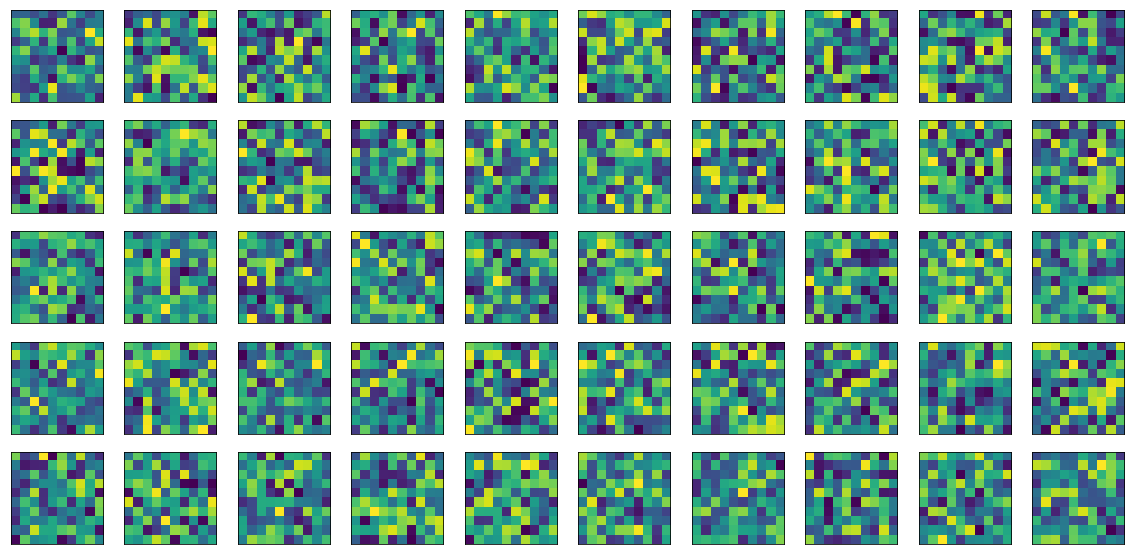

In [20]:
plotWeights(weights[4].T)